# 🕸️ Scrapify

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YonaniCodes/Scrapify/blob/main/notebooks/scrapify-demo.ipynb) -->


In [7]:
import sys
import os
import re

# Check if running in Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Define repo path
repo_url = "https://github.com/YonaniCodes/Scrapify.git"
repo_path = "/content/Scrapify"

if IN_COLAB:
    # Clone the repo only if it doesn't exist
    if not os.path.exists(repo_path):
        !git clone {repo_url} {repo_path}
    else:
        # Go into the repo and pull the latest changes
        %cd {repo_path}

        # Stash local changes if necessary to avoid conflicts with the pull
        !git stash
        !git pull


    # Add src/ to sys.path
    sys.path.append(f"{repo_path}/src")
else:
    # Local path config for non-Colab environment
    local_src_path = os.path.abspath("../src")
    sys.path.append(local_src_path)

# Import the scraper function from the module


# Call the scrape function (this will print "Scraping..........")



/content/Scrapify
No local changes to save
Already up to date.


In [8]:
!ls


LICENSE  notebooks  README.md  requirements.txt  src


In [9]:
 !pip install -r requirements.txt
 !pip install langid
 !pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement pywin32==306 (from versions: none)
ERROR: No matching distribution found for pywin32==306


In [13]:
import subprocess

# Get output of ls command
output = subprocess.check_output("ls", shell=True).decode().splitlines()

# Now you can conditionally check
if "firebase-adminsdk.json" in output:
    print("Everything is ready you can start working 🎉🎉🎉🎉")
else:
    print("firebase-adminsdk.json not found.😒😒😒 please ask Yonani for the file")

Everything is ready you can start working 🎉🎉🎉🎉


In [14]:
import sys
sys.path.append('/content/Scrapify/src')

In [15]:
from scrapify import scrape

from scrapify import get_report

In [16]:
get_report()

([], [])

In [17]:
!pip install googlesearch-python

In [18]:

from googlesearch import search

In [19]:
def get_links_from_simple_search(query):
    urls=list(set(search(query, num_results=20)))
    return urls

In [20]:
simple_query = "site:gov.et 'law' OR 'legal' OR 'የፍትህ' OR 'የኢትዮጵያ ሕግ' OR 'የፌዴራል ሕጎች' OR 'አዲስ ሕግ' OR 'አዲስ ደንብ'"
urls=get_links_from_simple_search(simple_query)


In [21]:
scrape(urls,"Biruk")

Processing: https://acso.gov.et/wp-content/uploads/2021/06/Federal-Negarit-Gazette-1113.pdf


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


Saved 1 records to data/extracted_data.jsonl
✅ Successfully registered: https://acso.gov.et/wp-content/uploads/2021/06/Federal-Negarit-Gazette-1113.pdf
Processing: https://www.e-consultation.gov.et/draft/3
✅ Successfully unscraped web registered: https://www.e-consultation.gov.et/draft/3
Processing: https://moe.gov.et/storage/Books/Administrative%20procedure%20proclamation%20(1).pdf
❌ Error at extraction: HTTPSConnectionPool(host='moe.gov.et', port=443): Max retries exceeded with url: /storage/Books/Administrative%20procedure%20proclamation%20(1).pdf (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7e66398f6890>, 'Connection to moe.gov.et timed out. (connect timeout=10)'))
✅ Successfully unscraped web registered: https://moe.gov.et/storage/Books/Administrative%20procedure%20proclamation%20(1).pdf
Processing: https://osdao.gov.et/wp-content/uploads/2024/04/Civil-Code-Amharic.pdf
❌ Error at extraction: HTTPSConnectionPool(host='osdao.gov.et', port=443): Max 

In [22]:
scraped, unscraped=get_report()

In [23]:
import pandas as pd
scraped_data= pd.DataFrame(scraped)

In [24]:
scraped_data

,url,scraper,timestamp
0,https://acso.gov.et/wp-content/uploads/2021/06...,Biruk,2025-04-11 10:32:02.433000+00:00
1,http://laws.eag.gov.et/Upload/CassationDecisio...,Biruk,2025-04-11 10:32:45.336000+00:00
2,https://laws.moj.gov.et/,Biruk,2025-04-11 10:32:27.774000+00:00
3,http://laws.eag.gov.et/,Biruk,2025-04-11 10:32:37.518000+00:00
4,https://www.moj.gov.et/about/mandate/,Biruk,2025-04-11 10:32:32.386000+00:00
5,http://www.moa.gov.et/wp-content/uploads/2024/...,Biruk,2025-04-11 10:32:25.517000+00:00


In [25]:
import pandas as pd
unscraped_data= pd.DataFrame(unscraped)
unscraped

[{'url': 'https://moe.gov.et/storage/Books/Administrative%20procedure%20proclamation%20(1).pdf',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 11, 10, 32, 17, 989000, tzinfo=datetime.timezone.utc),
  'reason': "HTTPSConnectionPool(host='moe.gov.et', port=443): Max retries exceeded with url: /storage/Books/Administrative%20procedure%20proclamation%20(1).pdf (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7e66398f6890>, 'Connection to moe.gov.et timed out. (connect timeout=10)'))"},
 {'url': 'https://osdao.gov.et/wp-content/uploads/2024/04/Civil-Code-Amharic.pdf',
  'timestamp': DatetimeWithNanoseconds(2025, 4, 11, 10, 32, 19, 585000, tzinfo=datetime.timezone.utc),
  'reason': 'HTTPSConnectionPool(host=\'osdao.gov.et\', port=443): Max retries exceeded with url: /wp-content/uploads/2024/04/Civil-Code-Amharic.pdf (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7e66398f5e50>: Failed to resolve \'osdao.gov.et\' ([Errno -2] Name

In [26]:
unscraped_data.timestamp=pd.to_datetime(unscraped_data.timestamp)
unscraped_data

,url,timestamp,reason
0,https://moe.gov.et/storage/Books/Administrativ...,2025-04-11 10:32:17.989000+00:00,"HTTPSConnectionPool(host='moe.gov.et', port=44..."
1,https://osdao.gov.et/wp-content/uploads/2024/0...,2025-04-11 10:32:19.585000+00:00,"HTTPSConnectionPool(host='osdao.gov.et', port=..."
2,https://www.e-consultation.gov.et/draft/3,2025-04-11 10:32:04.702000+00:00,Input contains amharic chracter but not amahar...
3,https://osdao.gov.et/wp-content/uploads/2024/0...,2025-04-11 10:32:38.529000+00:00,"HTTPSConnectionPool(host='osdao.gov.et', port=..."


## Great! 😊 Don't forget to ask me if you have any questions! You can always reach out to me here on Telegram: ✈️ [YonaYonani](https://t.me/YonaYonani)

In [37]:
simple_query = 'site:gov.et filetype:pdf "አካባቢ ግንባታ" OR "አካባቢ መረጃ" OR "ሕግ ስርዓት" OR "የግል ተቋማት" OR "አስተዳደር ስርዓት" OR "የመንግስት ትእዛዝ" OR "የትእዛዝ ቁጥር" OR "የፌዴራል መብት" OR "የአካባቢ መንግሥት"
urls = get_links_from_simple_search(simple_query)
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
filtered_urls = []
for url in urls:
    # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
    if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
        filtered_urls.append(url)







In [38]:

print(filtered_urls)

['https://www.fjli.gov.et/', 'https://e-consultation.gov.et/draft/2', 'https://aajs.gov.et/blogs/detail/68', 'https://www.fjli.gov.et/training.html', 'https://www.segocom.gov.et/sites/default/files/Attached%20Document/%E1%8B%A8%E1%8D%8D%E1%89%B5%E1%88%85_%E1%89%A2%E1%88%AE_%E1%8A%A0%E1%8B%B0%E1%88%A8%E1%8C%83%E1%8C%80%E1%89%B5_%E1%88%A8%E1%89%82%E1%89%85_%E1%8A%A0%E1%8B%8B%E1%8C%85.doc', 'https://www.fjli.gov.et/news/news.html', 'https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/', 'https://www.moj.gov.et/']


In [39]:
scrape(filtered_urls, "Yonas Awoke")

Processing: https://www.fjli.gov.et/


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


⚠️ URL is already registered, skipping.
Processing: https://e-consultation.gov.et/draft/2
⚠️ URL is already registered, skipping.
Processing: https://aajs.gov.et/blogs/detail/68
⚠️ URL is already registered, skipping.
Processing: https://www.fjli.gov.et/training.html
⚠️ URL is already registered, skipping.
Processing: https://www.segocom.gov.et/sites/default/files/Attached%20Document/%E1%8B%A8%E1%8D%8D%E1%89%B5%E1%88%85_%E1%89%A2%E1%88%AE_%E1%8A%A0%E1%8B%B0%E1%88%A8%E1%8C%83%E1%8C%80%E1%89%B5_%E1%88%A8%E1%89%82%E1%89%85_%E1%8A%A0%E1%8B%8B%E1%8C%85.doc
⚠️ URL is already registered, skipping.
Processing: https://www.fjli.gov.et/news/news.html
⚠️ URL is already registered, skipping.
Processing: https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/
⚠️ URL is already registered, skipping.
Processing: https://www.moj.gov.et/
⚠️ URL is already registered, skipping.


In [30]:
 scraped_data

,url,scraper,timestamp
0,https://acso.gov.et/wp-content/uploads/2021/06...,Biruk,2025-04-11 10:32:02.433000+00:00
1,http://laws.eag.gov.et/Upload/CassationDecisio...,Biruk,2025-04-11 10:32:45.336000+00:00
2,https://laws.moj.gov.et/,Biruk,2025-04-11 10:32:27.774000+00:00
3,http://laws.eag.gov.et/,Biruk,2025-04-11 10:32:37.518000+00:00
4,https://www.moj.gov.et/about/mandate/,Biruk,2025-04-11 10:32:32.386000+00:00
5,http://www.moa.gov.et/wp-content/uploads/2024/...,Biruk,2025-04-11 10:32:25.517000+00:00


In [31]:
scrape(["https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/"],"Yonas Awoke")

Processing: https://www.moj.gov.et/department/state-minister-for-governments-legal-and-justice-sector/legal-studies-drafting-and-consolidation-directorate-general/


/usr/local/lib/python3.11/dist-packages/google/cloud/firestore_v1/base_collection.py:303: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  return query.where(field_path, op_string, value)


⚠️ URL is already registered, skipping.


In [32]:
scrape(["https://www.fjli.gov.et/training.html"],"Yonas Awoke")

Processing: https://www.fjli.gov.et/training.html
⚠️ URL is already registered, skipping.


# **Lets visualize our scraping status**

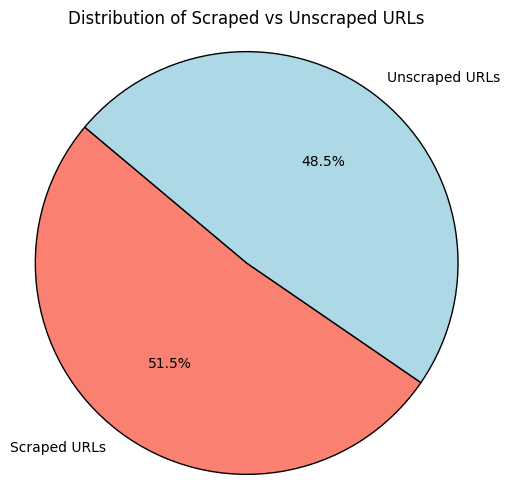

NameError: name 'uscraped_data' is not defined

In [76]:
simple_query="site:gov.et inurl:(pdf OR document) 'ትእዛዝ' OR 'የፌዴራል ሕጎች' OR 'የኢትዮጵያ ሕግ' OR 'ህጋዊ ሰነዶች' OR 'የፍርድ ውሳኔ' OR 'የህግ ባለሙያዎች' OR 'የህግ እትግታ'"
scraped,unscrape=get_report()
scraped_data= pd.DataFrame(scraped)
unscraped_data= pd.DataFrame(unscrape)

urls = get_links_from_simple_search(simple_query)
# Assuming scraped_data and unscraped_data are pandas DataFrames with a 'url' column
filtered_urls = []
for url in urls:
    # Check if the URL is NOT in both scraped_data.url and unscraped_data.url
    if url not in scraped_data['url'].values and url not in unscraped_data['url'].values:
      filtered_urls.append(url)
      print("not")


not


In [77]:
print(filtered_urls)

['']


In [78]:
scrape(filtered_urls,"Yonas Awoke")

Processing: 
Skipping invalid URL: 


# **Lets visualize our scraping status**

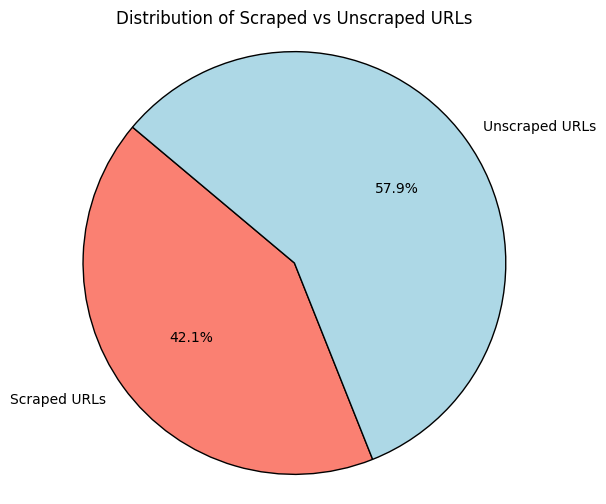

In [82]:
import matplotlib.pyplot as plt

# Example data for scraped and unscraped URLs (you should replace these with your actual data)
scraped_urls = scraped_data.url
unscraped_urls = unscraped_data.url

# Calculate the number of scraped and unscraped URLs
scraped_count = len(scraped_urls)
unscraped_count = len(unscraped_urls)

# Data for the pie chart
labels = ['Scraped URLs', 'Unscraped URLs']
sizes = [scraped_count, unscraped_count]
colors = ['salmon', 'lightblue']  # Green for scraped, red for unscraped

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title('Distribution of Scraped vs Unscraped URLs')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [81]:
len(scraped_data.url), len(unscraped_data)

(110, 151)

In [83]:
scraped,unscrape=get_report()
scraped_data= pd.DataFrame(scraped)
unscraped_data= pd.DataFrame(unscrape)

In [84]:
len(scraped_data.url), len(unscraped_data)

(110, 151)

In [87]:
len(scraped_data[scraped_data.scraper == "Abraham Dagne"])


49